## Unemployment in India
Unemployment is measured by the unemployment rate which is the number of people
who are unemployed as a percentage of the total labour force. We have seen a sharp
increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
can be a good data science project. 

This dataset contains the unemployment rate of all the states in India

* Region = states in India
* Date = date which the unemployment rate observed
* Frequency = measuring frequency (Monthly)
* Estimated Unemployment Rate (%) = percentage of people unemployed in each States of India
* Estimated Employed = percentage of people employed
* Estimated Labour Participation Rate (%) = labour force participation rate by dividing the number of   people actively participating in the labour force by the
* total number of people eligible to participate in the labor force
  force

In [1]:
# importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing the given dataset 
data = pd.read_csv("Unemployment in India.csv")

In [3]:
# First five rows
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
# Last five rows
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Number of rows and columns in the data set
data.shape

(768, 7)

* Dataset contains 7 features with 768 observations.

In [6]:
# Checking the Attribute Names
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
# Statistics of data
data.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [9]:
# Statistics of data for categorical data
data.describe(include='O')

,Region,Date,Frequency,Area
count,740,740,740,740
unique,28,14,2,2
top,Andhra Pradesh,31-10-2019,Monthly,Urban
freq,28,55,381,381


In [10]:
# Check missing values
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [11]:
# Drop missing values
data=data.dropna()

In [12]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [13]:
# After removal of missing values
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [14]:
# Checking Duplicate Values
data.duplicated().sum()

0

In [15]:
data.dtypes.to_frame().rename(columns={0:"Data-Types"})

,Data-Types
Region,object
Date,object
Frequency,object
Estimated Unemployment Rate (%),float64
Estimated Employed,float64
Estimated Labour Participation Rate (%),float64
Area,object


In [16]:
# Changing the Attribute Names
data.rename(columns={"Region":"States"," Date":"Date"," Estimated Unemployment Rate (%)":"Estimated Unemployment Rate (%)",
                  " Estimated Employed":"Estimated Employed"," Estimated Labour Participation Rate (%)":
                   "Estimated Labour Participation Rate (%)"},inplace=True)

In [17]:
data.head()

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [18]:
# Changing the Data-Type of Date Attribute.
data['Date'] = pd.to_datetime(data['Date'],dayfirst=True)

In [19]:
# Extracting Month from the Date Attribute
data["Month"] = data["Date"].dt.month

In [20]:
# Updating Months to Months Name
data['Month_Name'] =  data['Month'].apply(lambda x: calendar.month_abbr[x])

In [21]:
# Dropping the Months Attribute
data.drop(columns='Month',inplace=True)

In [22]:
# Checking Unique Months
data['Month_Name'].unique()

array(['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan',
       'Feb', 'Mar', 'Apr'], dtype=object)

In [23]:
# Extracting Years From the Date Attribute
data['Year'] = data['Date'].dt.year

In [24]:
data.head()

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month_Name,Year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,Jun,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,Jul,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,Aug,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,Sep,2019


In [25]:
# Checking Unique Years
data.Year.unique()

array([2019, 2020], dtype=int64)

In [26]:
# Checking the Unique Values in States Feature
data["States"].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [27]:
# Checking Unique Values in Area Attribute
data['Area'].unique()

array(['Rural', 'Urban'], dtype=object)

In [28]:
round(data.groupby(["States"])[["Estimated Unemployment Rate (%)","Estimated Employed",
                              "Estimated Labour Participation Rate (%)"]].mean(),2).sort_values(by="Estimated Unemployment Rate (%)")

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
States,,,
Meghalaya,4.80,689736.81,57.08
Odisha,5.66,6545746.96,38.93
Assam,6.43,5354772.15,44.87
Uttarakhand,6.58,1390228.11,33.78
Gujarat,6.66,11402012.79,46.10
Karnataka,6.68,10667119.29,41.35
Sikkim,7.25,106880.71,46.07
Madhya Pradesh,7.41,11115484.32,38.82
Andhra Pradesh,7.48,8154093.18,39.38


## Exploratory Data Analysis (EDA)

#### 1. Visualizing Average Employement Rate State Wise.

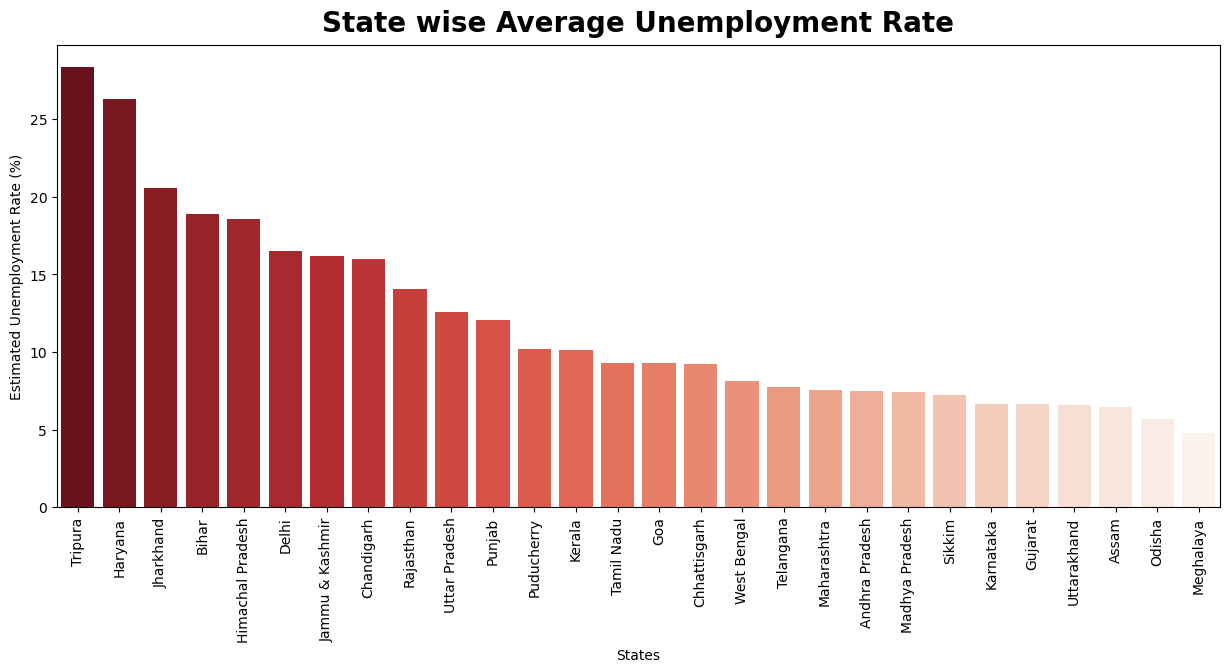

In [29]:
x = data.groupby(["States"])["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(15,6))
sns.barplot(x.index,x["Estimated Unemployment Rate (%)"],palette=sns.color_palette("Reds",28)[::-1])
plt.title("State wise Average Unemployment Rate",fontweight="black",fontsize=20,pad=10)
plt.xticks(rotation=90)
plt.show()

#### 2.Visualizing State Wise Average Labour Particiaption Rate.

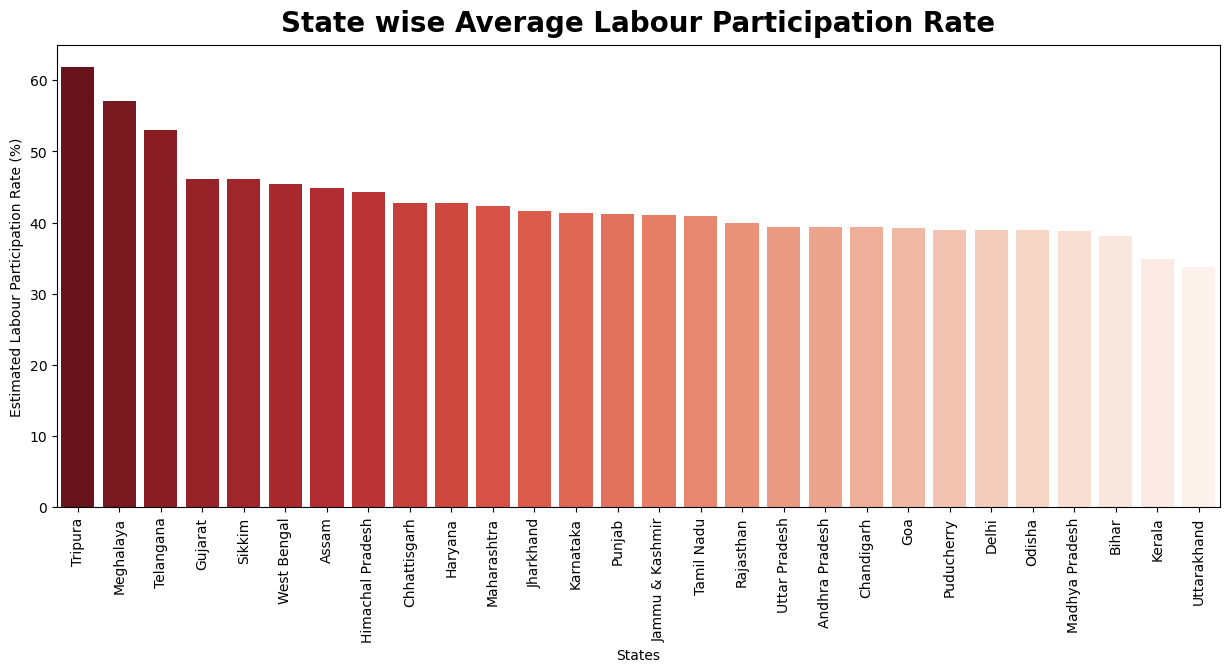

In [30]:
x = data.groupby(["States"])["Estimated Labour Participation Rate (%)"].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(15,6))
sns.barplot(x.index,x["Estimated Labour Participation Rate (%)"],palette=sns.color_palette("Reds",28)[::-1])
plt.title("State wise Average Labour Participation Rate",fontweight="black",fontsize=20,pad=10)
plt.xticks(rotation=90)
plt.show()

#### 3.Visualizing State Wise Total Estimated Employed

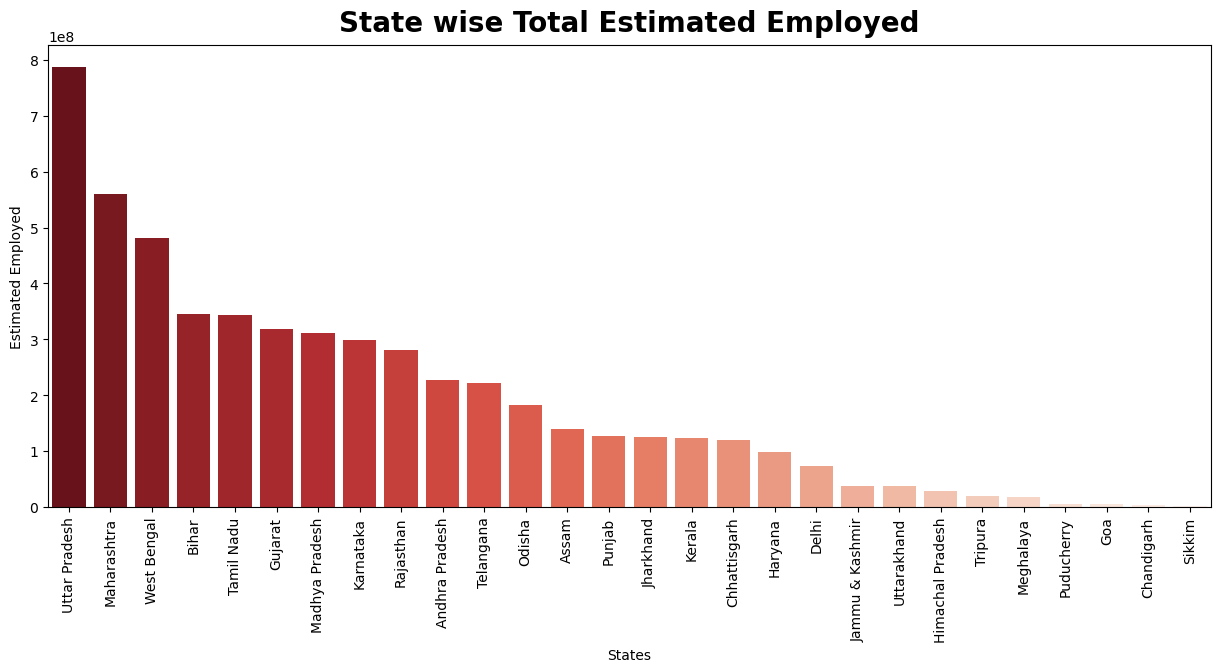

In [31]:
x = data.groupby(["States"])["Estimated Employed"].sum().sort_values(ascending=False).to_frame()
plt.figure(figsize=(15,6))
sns.barplot(x.index,x["Estimated Employed"],palette=sns.color_palette("Reds",28)[::-1])
plt.title("State wise Total Estimated Employed",fontweight="black",fontsize=20,pad=10)
plt.xticks(rotation=90)
plt.show()

#### 4.Visualizing Average "Unemployment Rate" & "Labour Participation" Rate w.r.t Area.

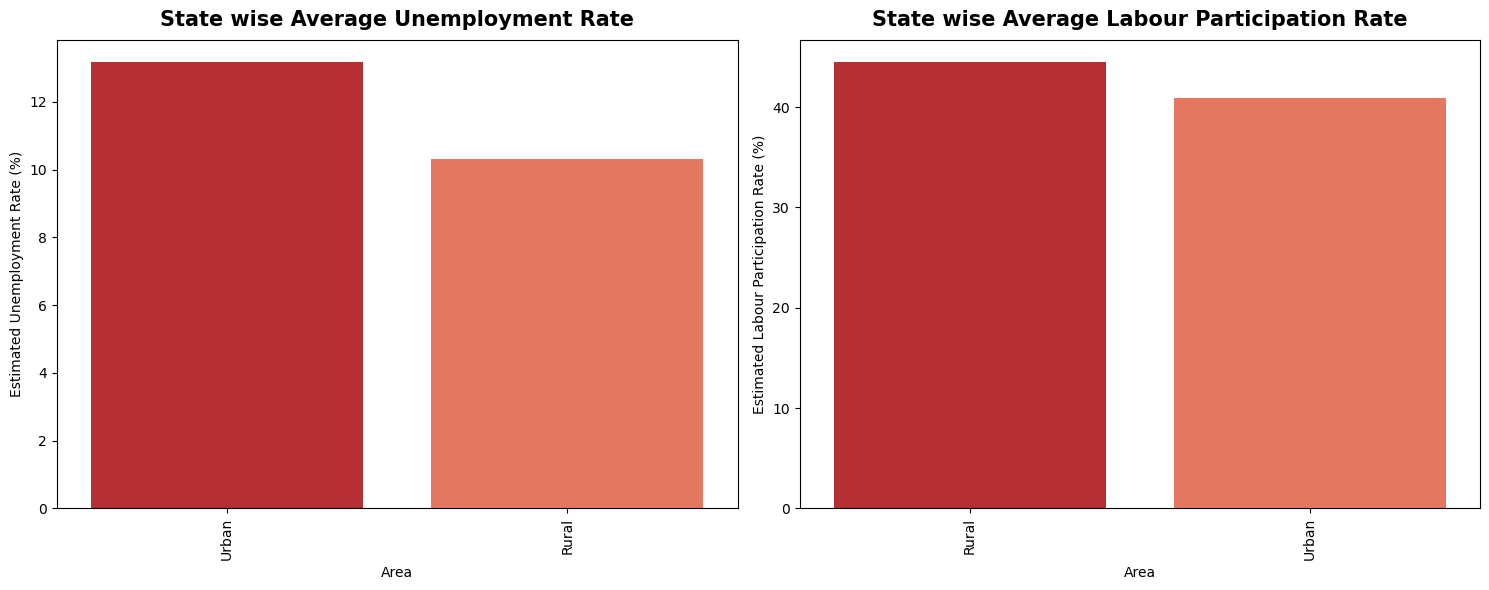

In [32]:
x = data.groupby(["Area"])["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x.index,x["Estimated Unemployment Rate (%)"],palette=sns.color_palette("Reds",3)[::-1])
plt.title("State wise Average Unemployment Rate",fontweight="black",fontsize=15,pad=10)
plt.xticks(rotation=90)

z = data.groupby(["Area"])["Estimated Labour Participation Rate (%)"].mean().sort_values(ascending=False).to_frame()
plt.subplot(1,2,2)
sns.barplot(z.index,z["Estimated Labour Participation Rate (%)"],palette=sns.color_palette("Reds",3)[::-1])
plt.title("State wise Average Labour Participation Rate",fontweight="black",fontsize=15,pad=10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### 5. Visualizing Unemployment and Labour Rate throughout the years

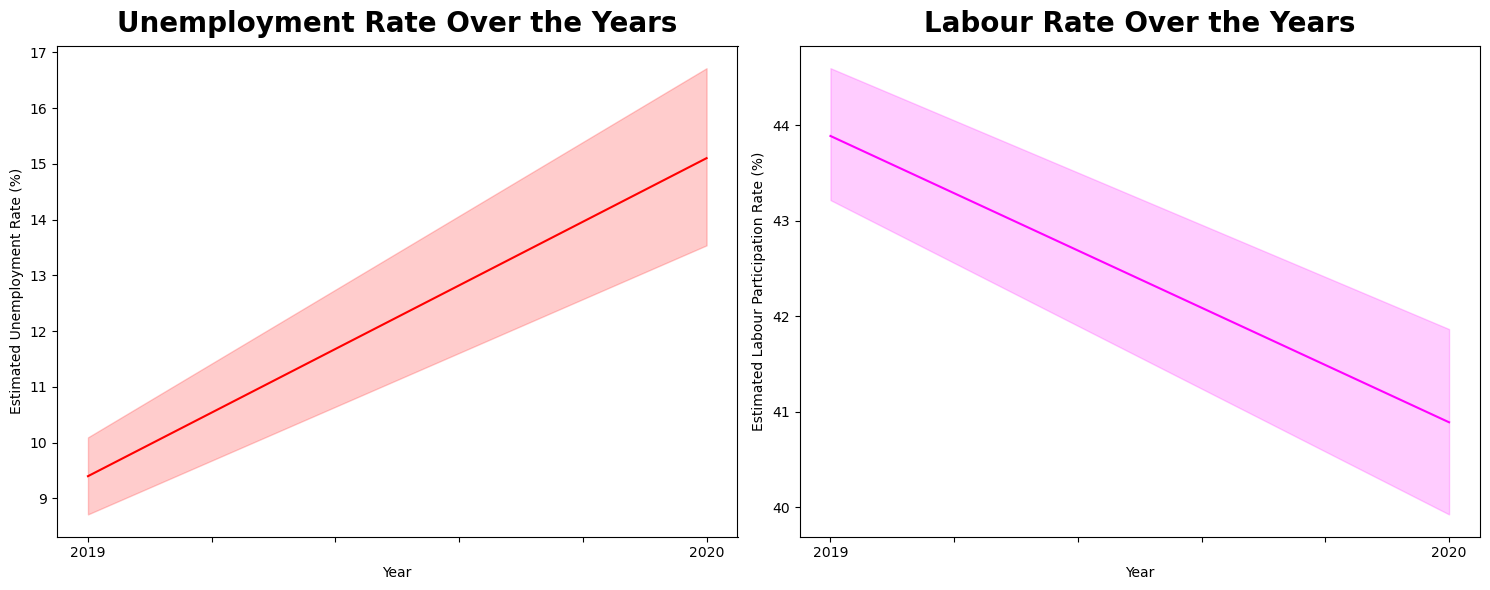

In [33]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.lineplot(data["Year"],data["Estimated Unemployment Rate (%)"],color="red")
ax.set_xticklabels(["","2019","","","","","2020"])
plt.title("Unemployment Rate Over the Years",fontweight="black",fontsize=20,pad=10)

plt.subplot(1,2,2)
ax = sns.lineplot(data["Year"],data["Estimated Labour Participation Rate (%)"],color="magenta")
ax.set_xticklabels(["","2019","","","","","2020"])
plt.title("Labour Rate Over the Years",fontweight="black",fontsize=20,pad=10)
plt.tight_layout()
plt.show()

#### 6. Visualizing Unemployment & Labour Rate in 2019 throughout the months

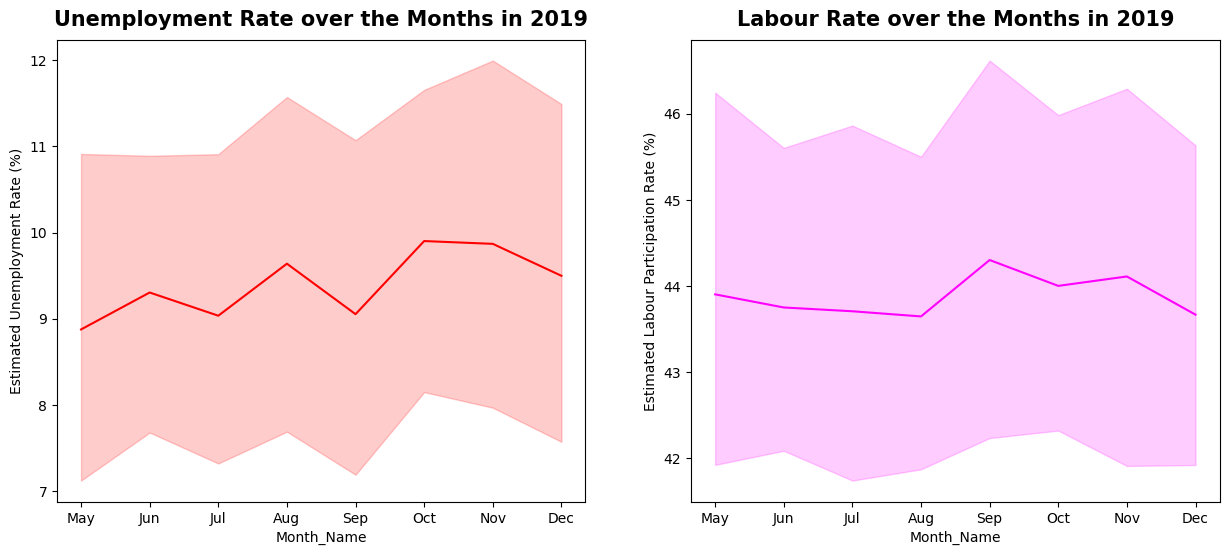

In [34]:
x = data[data["Year"]==2019]
y = data[data["Year"]==2020]

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.lineplot(x["Month_Name"],x["Estimated Unemployment Rate (%)"],color="red")
plt.title("Unemployment Rate over the Months in 2019",fontweight="black",fontsize=15,pad=10)

plt.subplot(1,2,2)
sns.lineplot(x["Month_Name"],x["Estimated Labour Participation Rate (%)"],color="magenta")
plt.title("Labour Rate over the Months in 2019",fontweight="black",fontsize=15,pad=10)
plt.show()

#### 7. Visualizing Unemployment & Labour Rate in 2020 throughout the months.

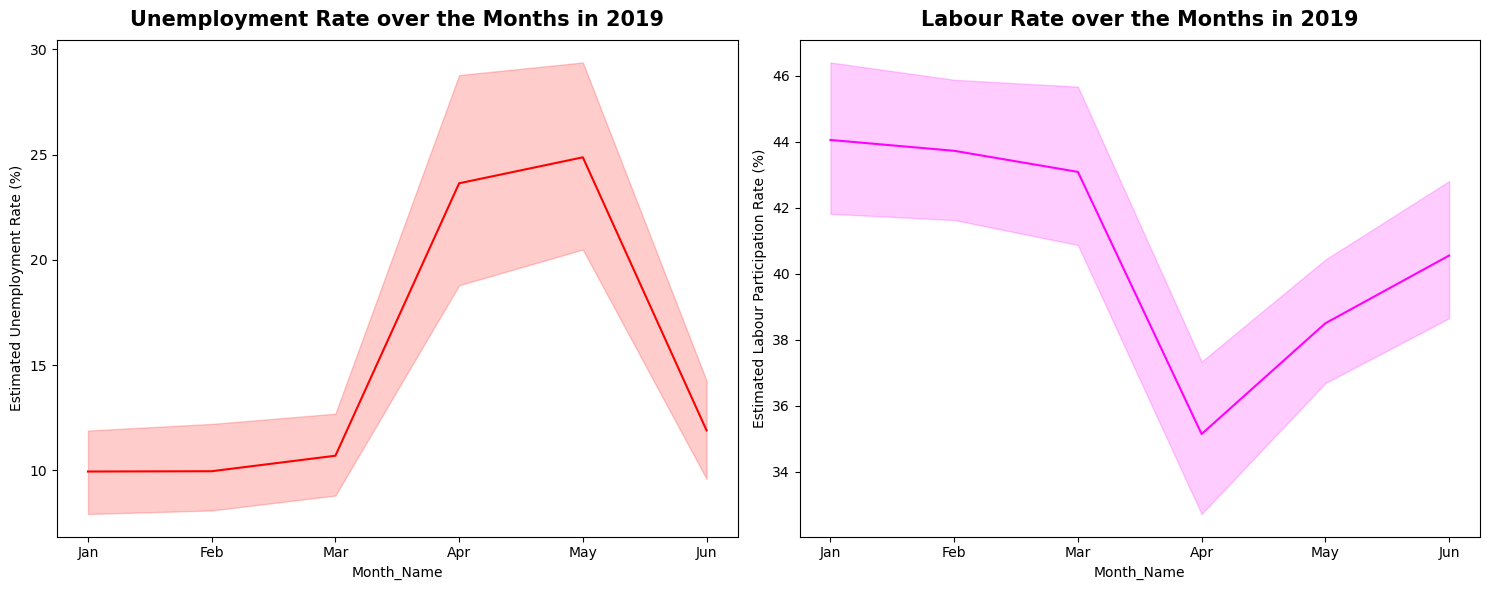

In [35]:
x = data[data["Year"]==2020]

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.lineplot(x["Month_Name"],x["Estimated Unemployment Rate (%)"],color="red")
plt.title("Unemployment Rate over the Months in 2019",fontweight="black",fontsize=15,pad=10)

plt.subplot(1,2,2)
sns.lineplot(x["Month_Name"],x["Estimated Labour Participation Rate (%)"],color="magenta")
plt.title("Labour Rate over the Months in 2019",fontweight="black",fontsize=15,pad=10)
plt.tight_layout()
plt.show()

### Impact of COVID-19 Lockdown in Unemployment Rate in India

#### 1. Visualizing States Wise Increment in Unemployment Rate During the Lockdown.

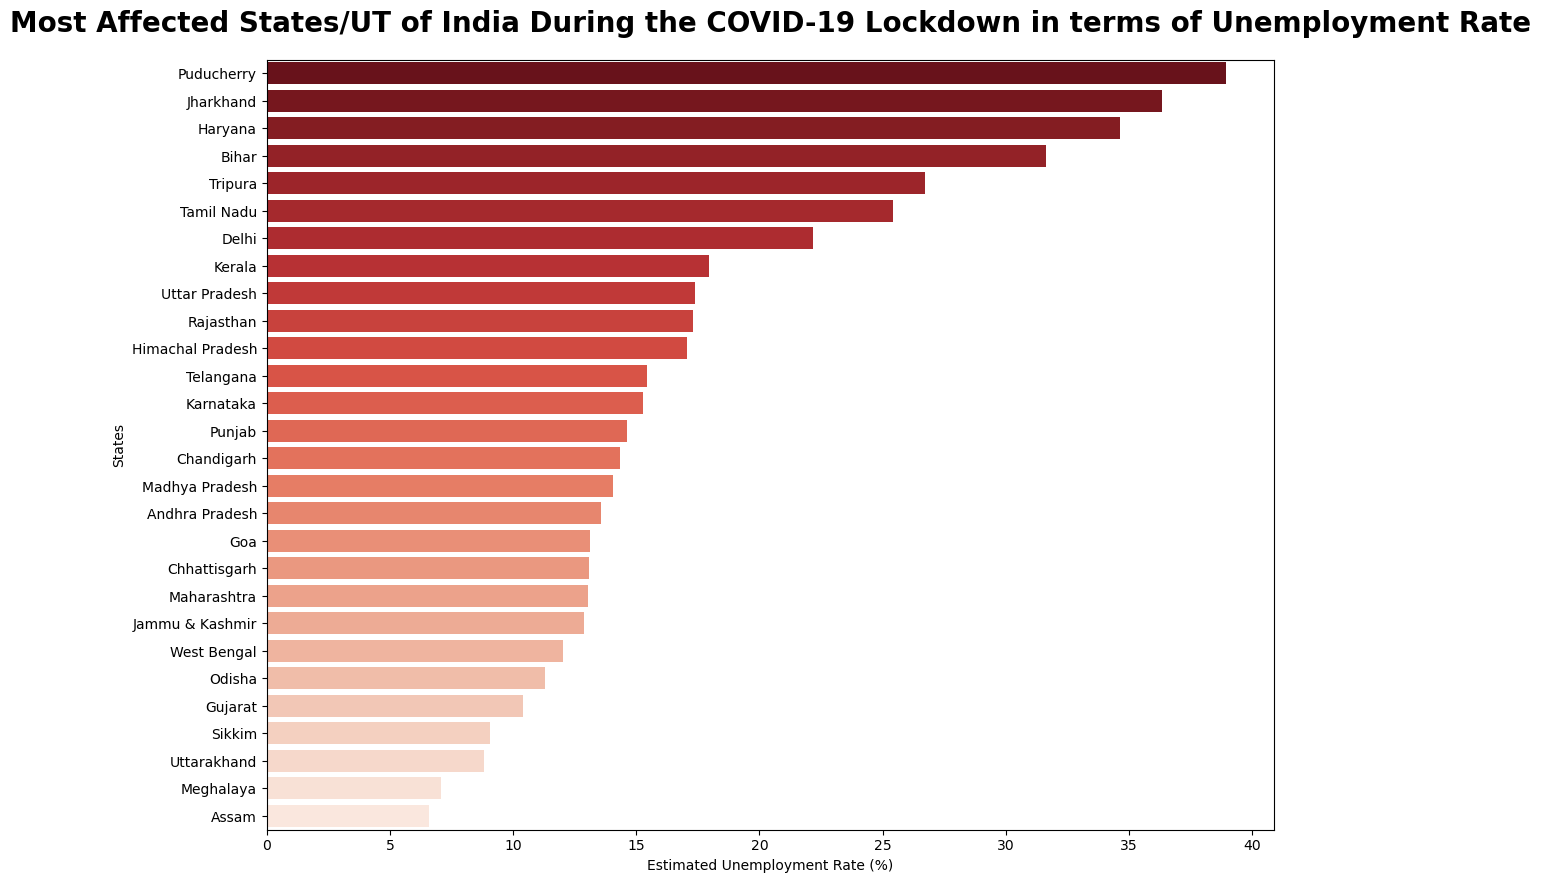

In [36]:
x = data[(data["Year"]==2020) & ((data["Date"].dt.month)>=3)]

z = x.groupby(["States"])["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(13,10))
sns.barplot(z["Estimated Unemployment Rate (%)"],z.index,palette=sns.color_palette("Reds",30)[::-1])
plt.title("Most Affected States/UT of India During the COVID-19 Lockdown in terms of Unemployment Rate",
          fontweight="black",fontsize=20,pad=20)
plt.show()

#### Visualizing States Wise Increment in Labour Rate During the LockdownVisualizing States Wise Increment in Labour Rate During the Lockdown

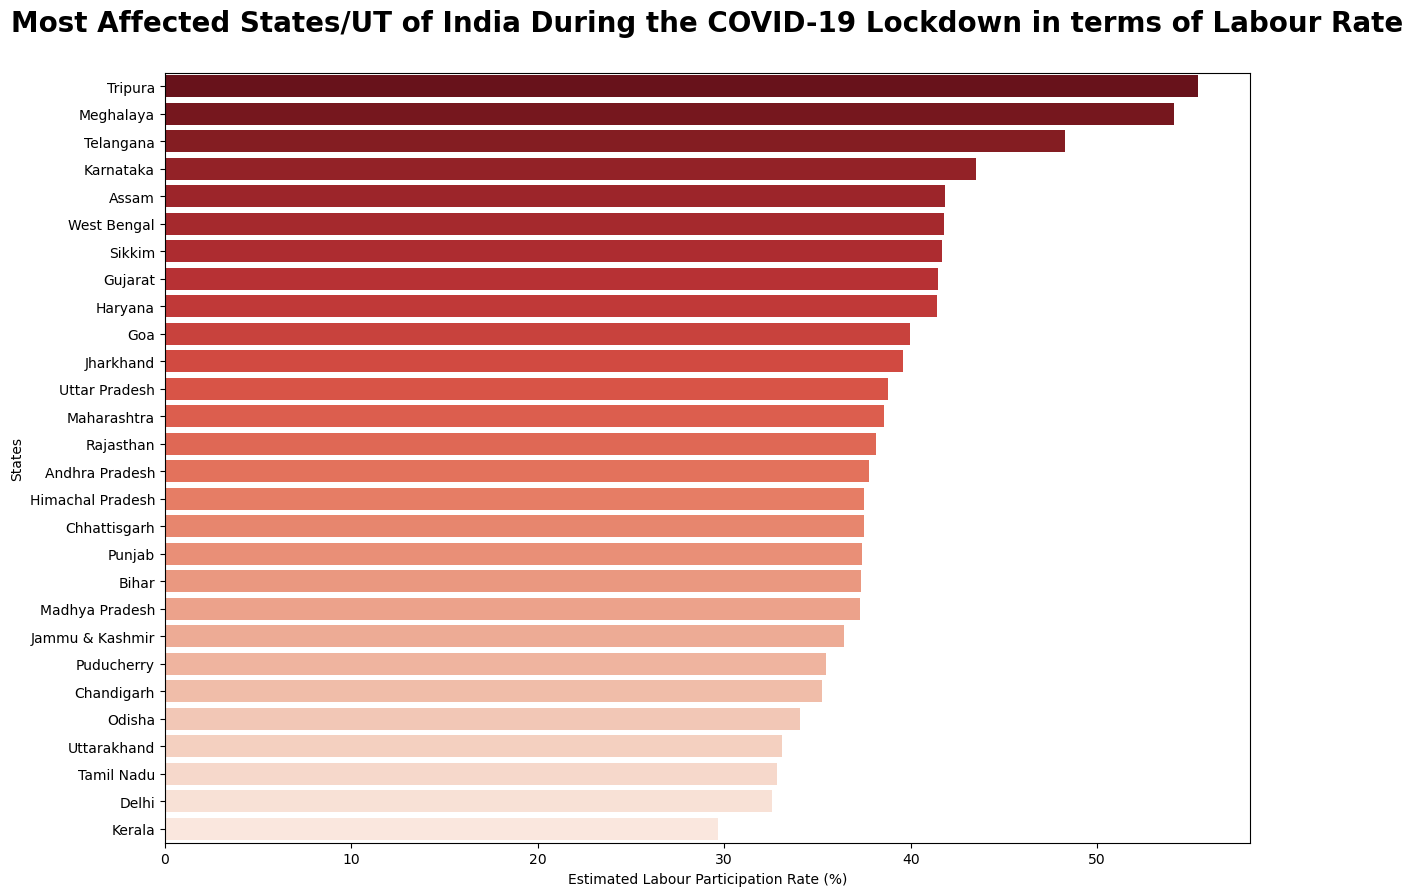

In [37]:
x = data[(data["Year"]==2020) & ((data["Date"].dt.month)>=3)]

z = x.groupby(["States"])["Estimated Labour Participation Rate (%)"].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(14,10))
sns.barplot(z["Estimated Labour Participation Rate (%)"],z.index,palette=sns.color_palette("Reds",30)[::-1])
plt.title("Most Affected States/UT of India During the COVID-19 Lockdown in terms of Labour Rate",
          fontweight="black",fontsize=20,pad=30)
plt.show()